In [1]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# read the first 5000 rows of medical_transformed.csv
df = pd.read_csv('medical_transformed.csv', index_col=0)
df

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,...,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,...,1,0,0,0,0,0,1,0,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,...,0,1,1,0,0,0,0,0,1,0
3,3,53,14370,0,18.06,4,0,1,0,2,...,1,0,0,0,0,1,0,0,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,...,1,0,1,0,0,0,1,0,0,0
5,1,22,1209,0,17.44,5,2,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,0,16.98,4,1,1,0,2,...,0,1,0,0,0,1,1,0,1,0
9997,4,87,14983,1,18.18,5,0,1,0,2,...,0,1,0,0,0,1,1,0,0,0
9998,3,45,65917,1,17.13,4,0,1,0,3,...,0,0,0,0,1,0,0,0,0,0


--------------------

In [13]:
# muultiple regression model using df and ols and 'Initial_days' as the dependent variable and all other variables in the dataset as independent variables
# APPLY LOG TRANSFORMATION ON THE DEPENDENT VARIABLE
df['Initial_days'] = np.log(df['Initial_days'])

X = df.drop('Initial_days', axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()

model_summary
# create a csv file with the model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     297.2
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:16:20   Log-Likelihood:                -12222.
No. Observations:               10000   AIC:                         2.452e+04
Df Residuals:                    9962   BIC:                         2.479e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.3894      0.147     16.235      0.000       2.101       2.678
Children                                0.0049      0.004      1.283      0.200      -0.003       0.012
Age                                     0.0002      0.000      0.544      0.586      -0.001       0.001
Income                              -1.978e-07   2.89e-07     -0.684      0.494   -7.64e-07    3.69e-07
ReAdmis                                 1.7859      0.017    104.404      0.000       1.752       1.819
VitD_levels                            -0.0040      0.004     -0.988      0.323      -0.012       0.004
Doc_visits                             -0.0082      0.008     -1.046      0.295      -0.024       0.007
vitD_supp                               0.0105      0.013      0.803      0.422      -0.015       0.036
HighBlood                              -0.0374      0.017     -2.231      0.026      -0.070      -0.005
Stroke                                  0.0114      0.021      0.551      0.582      -0.029       0.052
Complication_risk                      -0.0129      0.011     -1.139      0.255      -0.035       0.009
Overweight                             -0.0099      0.018     -0.546      0.585      -0.046       0.026
Arthritis                               0.0244      0.017      1.420      0.156      -0.009       0.058
Diabetes                                0.0051      0.019      0.277      0.782      -0.031       0.041
Hyperlipidemia                         -0.0233      0.017     -1.336      0.182      -0.058       0.011
BackPain                                0.0232      0.017      1.381      0.167      -0.010       0.056
Anxiety                                 0.0160      0.018      0.909      0.363      -0.019       0.051
Allergic_rhinitis                       0.0133      0.017      0.790      0.430      -0.020       0.046
Reflux_esophagitis                      0.0210      0.017      1.253      0.210      -0.012       0.054
Asthma                                  0.0070      0.018      0.385      0.700      -0.029       0.043
S_T_Admission                           0.0238      0.012      2.003      0.045       0.001       0.047
S_T_Treatment                           0.0064      0.011      0.586      0.558      -0.015       0.028
S_T_Visits                             -0.0052      0.010     -0.513      0.608      -0.025       0.015
S_Reliability                           0.0215      0.009      2.392      0.017       0.004       0.039
S_Options                               0.0054      0.009      0.565      0.572      -0.013       0.024
S_Hours_Treatment                      -0.0095      0.010     -0.975      0.330      -0.029       0.010
S_Staff                                -0.0144      0.009     -1.56

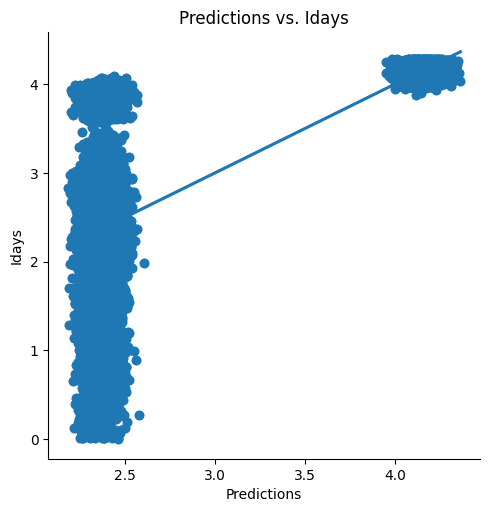

In [14]:
df['predictions'] = model.fittedvalues
df['Idays'] = Y
df

# create a scatter plot of predicions vs. Idays WITH BEST FIT LINE AND CI
sns.lmplot(x='predictions', y='Idays', data=df)
plt.scatter(df['predictions'], df['Idays'])
plt.xlabel('Predictions')
plt.ylabel('Idays')
plt.title('Predictions vs. Idays')
plt.show()


# Initial Regression Model based on all predictors

**Initial_days = 19.4602 + 0.0401(Children) + 0.0035(Age) - 3.442e-06(Income) + 46.4505(ReAdmis) - 0.0775(VitD_levels) - 0.1714(Doc_visits) + 0.2924(vitD_supp) - 0.4475(HighBlood) - 0.2008(Stroke) - 0.3944(Complication_risk) - 0.2090(Overweight) + 0.6649(Arthritis) + 0.0132(Diabetes) - 0.3959(Hyperlipidemia) + 0.3505(BackPain) + 0.5303(Anxiety) + 0.4092(Allergic_rhinitis) + 0.4223(Reflux_esophagitis) + 0.0406(Asthma) + 0.4003(S_T_Admission) + 0.1342(S_T_Treatment) - 0.1296(S_T_Visits) + 0.3911(S_Reliability) + 0.0093(S_Options) - 0.2056(S_Hours_Treatment) - 0.2466(S_Staff) - 0.1981(S_Active_Listening) + 0.1602(Area_Suburban) + 0.3731(Area_Urban) - 0.0263(Marital_Married) + 0.4302(Marital_Never Married) + 0.7953(Marital_Separated) + 0.2762(Marital_Widowed) - 0.0963(Gender_Male) - 0.2836(Gender_Nonbinary) - 1.6011(Initial_admin_Emergency Admission) - 0.2463(Initial_admin_Observation Admission)**




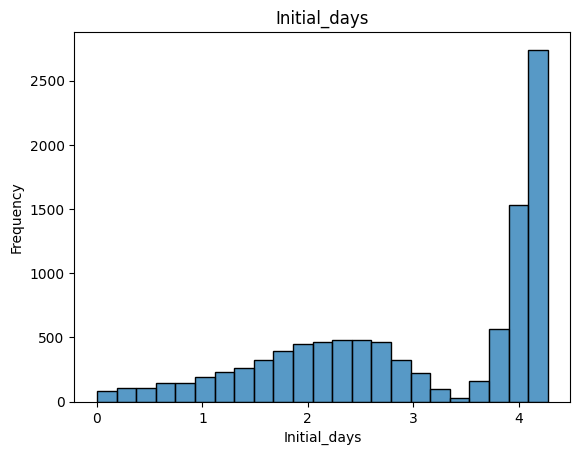

In [22]:
#PLOT IHST O INITIAL_DAYS

sns.histplot(df['Initial_days'])
plt.xlabel('Initial_days')
plt.ylabel('Frequency')
plt.title('Initial_days')
plt.show()


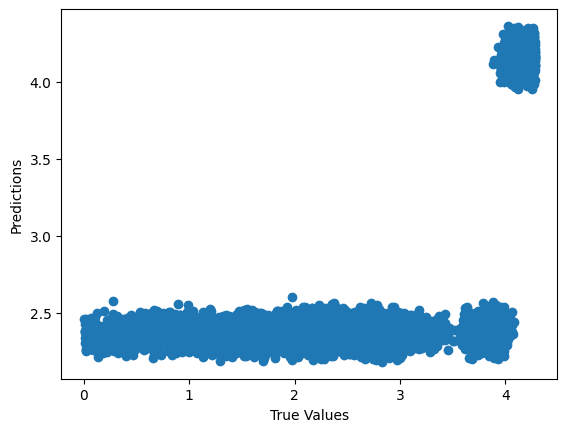

In [21]:
# visualize the fitted model
plt.scatter(Y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [17]:
# calculate RSE
mse = model.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)


Residual Standard Error (RSE): 0.8229313650754654


## Initial Model Fit:

- The R-squared is 0.726, meaning that approximately 72.6% of the variability in `Initial_days` may be explained by the model, which in combination with the almost identical Adj. R-squared:.725 a surprising for this initial model.
- The F-statistic is 714.14 with a Prob (F-statistic) of 0.00, *suggesting* that the model is statistically significant overall.
- The AIC 8.090e+04 and BIC 8.117e+04 are very similar, suggesting suggests that both are close in their evaluation of model complexity. These will be re-examined in the reduced model to see if they are lowered. 
- Residual Standard Error calculation (RSE): 13.79 (https://stackoverflow.com/questions/63333999/residual-standard-error-of-a-regression-in-python) `Initial_days` ranges from 1 to 72 days. An RSE of 13.79 days represents over 19% (13.792 / 72 * 100) of the total range. This suggests that, on average, the model's predictions for length of stay can deviate from the actual values by up to 13.792 days. This seems significant in this context and indicates room for improvement.

(middleton slides II https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d)

Variables.
Many predictor variables have high t-values and low p-values (P>|t|), indicating that they are statistically significant. Of note is the `ReAdmis` feature, it has a very low p-value and a highly significant coefficient (46.4505), suggesting a strong association with `Initial_days`
However, variables such as Children, Age, Income, and others have high p-values, indicating that they might not be significant predictors of `Initial_days` in the presence of other variables.
The const coefficient (y-intercept) is 19.5835, which represents the expected value of `Initial_days` when all other predictors are at zero.

- Overall I am very skeptical of an initial model with an R-square value this high and so many supposedly significant observations. Especially with the warning about potential multicollinearity. There are several things we can check. The model is likely to perform poorly on new data.

Issues:
The note on multicollinearity "[2] The condition number is large, 8.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems." indicates that there might be high correlation between some predictors. This needs to be addressed. Variance inflation factor (VIF) analysis will be used to identify and remove highly correlated predictors.




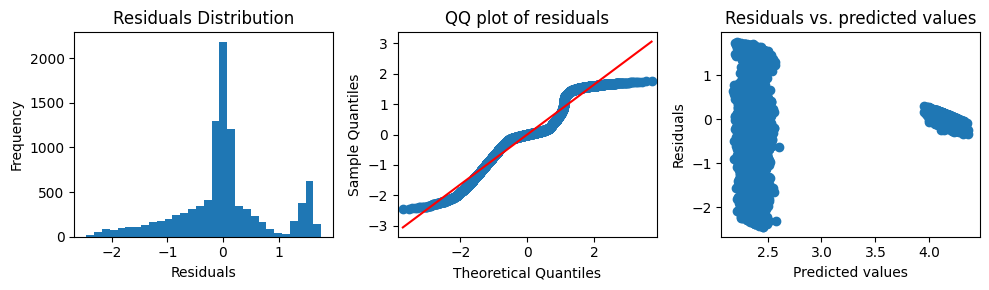

In [20]:

# Calculate the residuals
residuals = Y - predictions

# Plot the residuals
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Residuals Distribution
axes[0].hist(residuals, bins=30)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')

# QQ plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals")

# Residuals vs. predicted values
axes[2].scatter(predictions, residuals)
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Residuals vs. predicted values")

plt.tight_layout()
plt.show()



- Ideally, we'd like to see a normal distribution centered around zero, but this**histogram** indicates a slightly bimodal distribution that is skewed to the right, with a tail that grows slightly positive values. 
- The **Q-Q plot** shows that the residuals are not normally distributed, as the points do not fall along the straight line. This plot required research to interpret as I was not familiar with it. From https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html: "*The points in Q-Q plot then cross below the blue line indicating that the actual quantiles that are close to zero are farther from zero than they should be theoretically. At the center of the theoretical distribution there are no data in the actual dataset, and therefore there is no point in the Q-Q plot at (0, 0). The upper half of the Q-Q plot is a reflection across X and Y of the bottom half.*" The author also suggest this is the results of a residual distribution that is similar to the one I have. 
- According to https://indhumathychelliah.com/2021/08/03/everything-to-know-about-residuals-in-linear-regression/ The residuals (errors) should be scattered randomly above and below the zero line across the entire range of predicted value and There should be no discernible pattern in the scatter plot of residuals. This is not the case in my scatter plot of residuals. Indicating that the model is not a good fit for the data.


We will  use Feature Selection Techniques to try and create a better performing, reduced model. We will use the following techniques:
- RSE (Residual Standard Error)
- AIC (Akaike Information Criterion)
- BIC (Bayesian Information Criterion)
- Adjusted R-squared
- VIF (Variance Inflation Factor)
- Backward Elimination


In [ ]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

# write vif to csv file 
vif.to_csv('vif.csv')


In [ ]:
# correlation matrix displayed in large dimensions
plt.figure(figsize=(30, 30))



# Exclude the dependent variable from the DataFrame
independent_variables = df.drop('Initial_days', axis=1)

# Calculate the correlation matrix
correlation_matrix = independent_variables.corr()

# Print or display the correlation matrix
correlation_matrix

# write the correlation matrix to a file
correlation_matrix.to_csv('correlation_matrix.csv')


From the VIF analysis, most variables have VIF values well below 5, indicating no significant multicollinearity among them. which is suprising given the message we got from the model summary: "[2] The condition number is large, 8.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems." The highest VIF values are observed for `S_T_Admission`, `S_T_Treatment`, and `marital` status categories, but even these do not exceed the threshold of 5, suggesting moderate correlation at most. 


Additionally, the R squared value is very high, which is also suprising given the message we got from the model summary. 

So in this case, I will go with what the data is telling me. Here simply note the VIF scores and the message and rely on p-values to remove predictors that are not significant. Initially, I was going to use stepwise regression to remove predictors that are not significant, but given the high R squared value and the low VIF scores, I will simply remove predictors that have a p-value greater than 0.05 and see how that affects the model.

P-values which are greater than 0.05 will be removed from the model.

In [ ]:
# Identify the statistically significant variables
significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()

# Remove 'const' from the list as we manually add it for the intercept
if 'const' in significant_vars:
    significant_vars.remove('const')

print('Significant variables:', significant_vars)

# Create a reduced model with only significant variables
X_reduced = X[significant_vars]

# Fit the OLS model with reduced variables
model_reduced = sm.OLS(Y, sm.add_constant(X_reduced)).fit()

# Print the summary of the reduced model
model_reduced.summary()


In [ ]:

# Create a scatter plot of the actual vs predicted values of the dependent variable
plt.scatter(Y, model_reduced.predict(sm.add_constant(X_reduced)))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
# cvhekc the normality of the residuals
residuals = model_reduced.resid
fig = sm.qqplot(residuals, line='s')
plt.show()


This model has an R-squared value of 0.728, indicating that approximately 72.8% of the variance in 'Initial_days' can be explained by the included predictors. This is nearly identical to the R-squared value of the full model, suggesting that the reduced model retains the explanatory power of the full model while being simpler and more focused on the most impactful variables.

The significant predictors in this model include 'ReAdmis', 'Complication_risk', 'Arthritis', 'Anxiety', 'S_T_Admission', 'S_Reliability', 'S_Staff', and 'Initial_admin_Emergency Admission'. Each of these variables has a p-value less than 0.05, indicating they are statistically significant in predicting the initial days of hospitalization.

This reduced model is more efficient and easier to interpret while maintaining a strong explanatory power, making it a valuable tool for understanding the factors that influence the initial days of hospitalization.



In [ ]:
# create a visualization of the model
plt.scatter(predictions, Y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# create a residual plot
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# readmis

### G & H: References

- Western Governors University. (2023, December 21). D207 - Medical_clean Dataset. Retrieved from https://lrps.wgu.edu/provision/227079957

- Western Governors University IT Department. (2023). R or Python? How to decide which programming language to learn. Retrieved from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#

- Datacamp. (2023, December 12). D207 - Exploratory Data Analysis. Retrieved from https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis 

- Sewell, Dr. (2023). WGU D207 Exploratory Data Analysis [Webinars]. WGU Webex. Accessed December, 2023. https://wgu.webex.com/webappng/sites/wgu/meeting/info/c4aca2eac546482880f1557c938abf40?siteurl=wgu&MTID=me73470c2eac9e863c6f47a3d5b6d2f26 

- Seaborn Developers. (2023). seaborn.scatterplot — seaborn 0.11.2 documentation. Retrieved December 22, 2023, from https://seaborn.pydata.org/generated/seaborn.scatterplot.html

OLD ABOVE _ DELETE?KEEP? as needed.

- Statology. (n.d.). *The Five Assumptions of Multiple Linear Regression*. Statology. Retrieved March 10, 2024, from www.statology.org/multiple-linear-regression-assumptions/

- Pennsylvania State University. (n.d.). *5.3 - The Multiple Linear Regression Model*. STAT 501. Retrieved March 10, 2024, from online.stat.psu.edu/stat501/lesson/5/5.3

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html



In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('medical_transformed.csv')

# Calculate IQR for Initial_days
Q1 = df['Initial_days'].quantile(0.25)
Q3 = df['Initial_days'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on IQR
df_no_outliers_iqr = df[(df['Initial_days'] >= lower_bound) & (df['Initial_days'] <= upper_bound)]

# Define a function to calculate the modified Z-score
def modified_z_score(series):
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    modified_z_scores = 0.6745 * (series - median) / mad
    return modified_z_scores

# Calculate modified Z-score for Initial_days
df['Modified_Z_Score'] = modified_z_score(df['Initial_days'])

# Define a threshold for identifying outliers using modified Z-score
threshold = 3.5

# Filter out outliers based on modified Z-score
df_no_outliers_mod_z = df[np.abs(df['Modified_Z_Score']) <= threshold]

# Now you have two DataFrames:
# df_no_outliers_iqr: without outliers based on IQR
# df_no_outliers_mod_z: without outliers based on modified Z-score


In [ ]:
# Number of outliers identified by the IQR method
num_outliers_iqr = df[(df['Initial_days'] < lower_bound) | (df['Initial_days'] > upper_bound)].shape[0]

num_outliers_iqr

In [ ]:
# Number of outliers identified by the Modified Z-score method
num_outliers_mod_z = df[np.abs(df['Modified_Z_Score']) > threshold].shape[0]
num_outliers_mod_z

In [ ]:
# manage memory by using gc.collect() to clear memory
import gc
gc.collect()


# Limitations

Beware of the following with your regression analysis:

Overfitting can occur due to limited data points.

Multicollinearity occurs when high association (correlation) with other IVs.

P-values can be unreliable and coefficients swing wildly

Check for pairwise correlations and high VIF (> 10)

Tune your model with as many variables as practical. Forward, backward, stepwise
    regression based on AIC, BIC, etc.
ppoint 5 https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

# Errata n notes

I'm wrapping up task 1, and my research question is 'what factors influence the total charge a patient receives'. Total charge has a bimodal distribution that I did a log transform on which helped tremendously. Regarding my final reduced model, the RSE is pretty good, both residual normality and homoscedasticity are mostly there. Both have slight variance from expectations around the tails. For fun I decided to re run my code but filtered my data for patients staying less than a month and it improved my RSE, normality and homoscedasticity. Should I change my research question or keep it broad and just explain the limitations of outlier patients?


